In [87]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [32]:
attrition_data = pd.read_csv("IBM_Attrition_Data.csv")

In [33]:
attrition_data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [34]:
attrition_data.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [35]:
attrition_data.shape

(1470, 13)

In [36]:
attrition_data.isna().any()

Age                        False
Attrition                  False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EnvironmentSatisfaction    False
JobSatisfaction            False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
WorkLifeBalance            False
YearsAtCompany             False
dtype: bool

In [37]:
def plot_distibution(data, x_data, y_data, title):
    style.use('ggplot')
    plt.figure(figsize=(12,7))
    plt.hist(data, bins=30)
    plt.xlabel(x_data)
    plt.ylabel(y_data)
    plt.title(title)
    plt.show()
    
def box_plot(data):
    sns.boxplot(x=data)
    
def bar_plot(data, title):
    style.use('ggplot')
    plt.figure(figsize=(12,7))
    data.plot(kind='barh',color='blue')
    plt.title(title)
    plt.show()

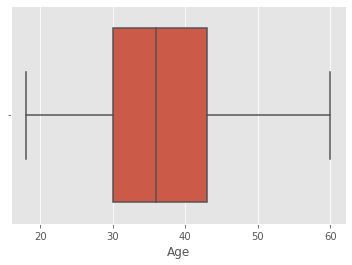

In [38]:
# age distribution of employees in IBM
box_plot(attrition_data['Age'])

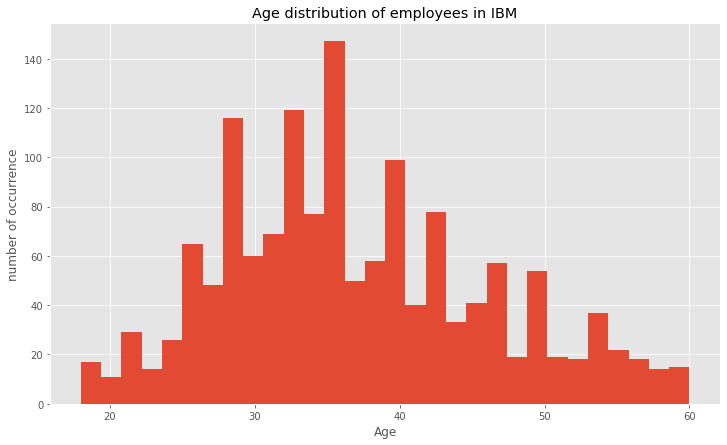

In [39]:
plot_distibution(attrition_data['Age'], 'Age', 'number of occurrence', 'Age distribution of employees in IBM')

<AxesSubplot:xlabel='Age', ylabel='Count'>

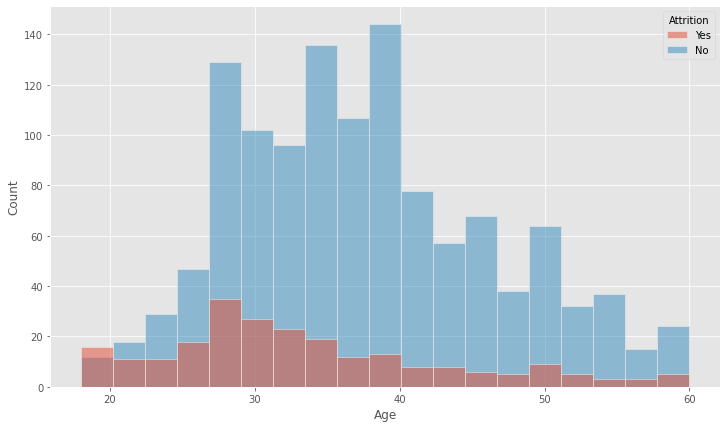

In [40]:
# explore attrition by age
plt.figure(figsize=(12, 7))
sns.histplot(data=attrition_data, x='Age', hue='Attrition')

In [59]:
attrition_field = attrition_data.Attrition.value_counts()
attrition_field

0    1233
1     237
Name: Attrition, dtype: int64

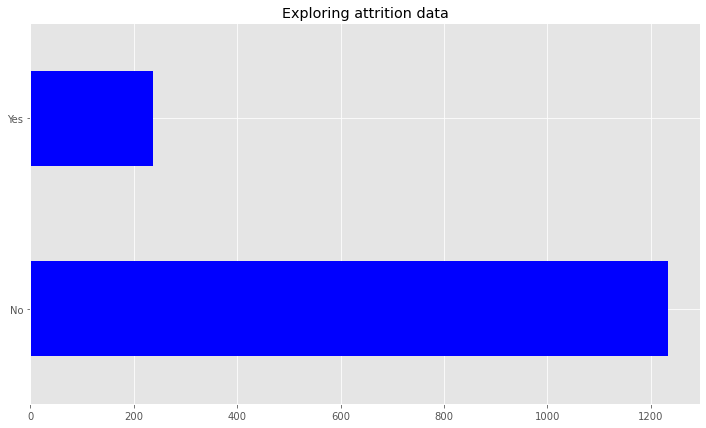

In [41]:
bar_plot(attrition_data.Attrition.value_counts(), 'Exploring attrition data')

In [42]:
# explore data for left employees
left_employees = attrition_data['Attrition'] == 'Yes'
left_employees = attrition_data[left_employees]
print(left_employees.shape)
left_employees.head()

(237, 13)


,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
14,28,Yes,Research & Development,24,3,Life Sciences,3,3,Single,2028,5,3,4
21,36,Yes,Sales,9,4,Life Sciences,3,1,Single,3407,7,3,5
24,34,Yes,Research & Development,6,1,Medical,2,1,Single,2960,2,3,4


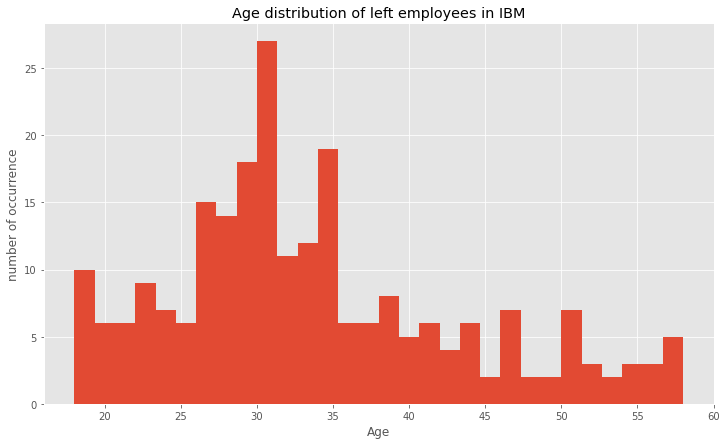

In [43]:
plot_distibution(left_employees['Age'], 'Age', 'number of occurrence', 'Age distribution of left employees in IBM')

In [44]:
# distribution of employees by education field
attrition_data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [45]:
education_field = attrition_data['EducationField'].value_counts()
education_field

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

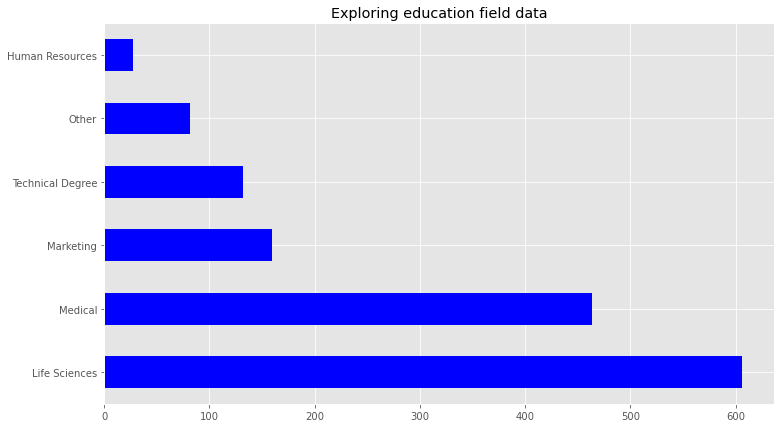

In [46]:
bar_plot(education_field, 'Exploring education field data')

In [98]:
# distribution of employees by department
attrition_data.Department.unique()

array([2, 1, 3], dtype=int64)

In [47]:
department = attrition_data['Department'].value_counts()
department

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

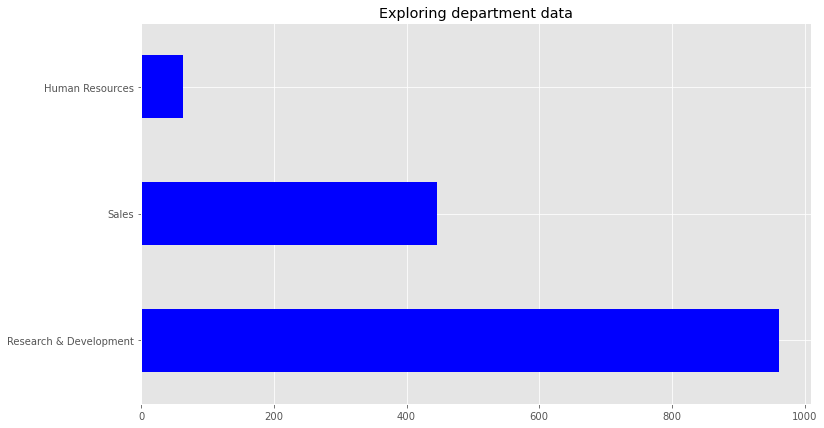

In [48]:
bar_plot(department, 'Exploring department data')

In [49]:
marital_status = attrition_data.MaritalStatus.value_counts()
marital_status

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

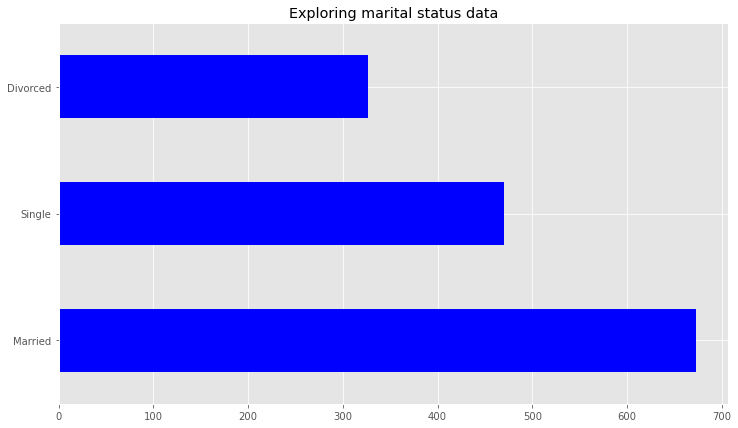

In [50]:
bar_plot(marital_status, 'Exploring marital status data')

In [51]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [52]:
attrition_data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [58]:
attrition_data.Attrition.replace('Yes', 1, inplace=True)
attrition_data.Attrition.replace('No', 0, inplace=True)
print(attrition_data.Attrition.value_counts())
attrition_data.head()

0    1233
1     237
Name: Attrition, dtype: int64


,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,1,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,1,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,1,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,1,2,1,Medical,1,2,Married,3468,9,3,2


In [55]:
attrition_data.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [60]:
attrition_data.Department.replace('Research & Development', 1, inplace=True)
attrition_data.Department.replace('Sales', 2, inplace=True)
attrition_data.Department.replace('Human Resources', 3, inplace=True)
print(attrition_data.Department.value_counts())
attrition_data.head()

1    961
2    446
3     63
Name: Department, dtype: int64


,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,1,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,1,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,1,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,1,2,1,Medical,1,2,Married,3468,9,3,2


In [62]:
attrition_data.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [64]:
attrition_data.EducationField.replace('Life Sciences', 1, inplace=True)
attrition_data.EducationField.replace('Medical', 2, inplace=True)
attrition_data.EducationField.replace('Marketing', 3, inplace=True)
attrition_data.EducationField.replace('Technical Degree', 4, inplace=True)
attrition_data.EducationField.replace('Other', 5, inplace=True)
attrition_data.EducationField.replace('Human Resources', 6, inplace=True)
print(attrition_data.EducationField.value_counts())
attrition_data.head()

1    606
2    464
3    159
4    132
5     82
6     27
Name: EducationField, dtype: int64


,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,Single,5993,8,1,6
1,49,0,1,8,1,1,3,2,Married,5130,1,3,10
2,37,1,1,2,2,5,4,3,Single,2090,6,3,0
3,33,0,1,3,4,1,4,3,Married,2909,1,3,8
4,27,0,1,2,1,2,1,2,Married,3468,9,3,2


In [66]:
attrition_data.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [67]:
attrition_data.MaritalStatus.replace('Married', 1, inplace=True)
attrition_data.MaritalStatus.replace('Single', 2, inplace=True)
attrition_data.MaritalStatus.replace('Divorced', 3, inplace=True)
print(attrition_data.MaritalStatus.value_counts())
attrition_data.head()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64


,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,2,5993,8,1,6
1,49,0,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,1,2,2,5,4,3,2,2090,6,3,0
3,33,0,1,3,4,1,4,3,1,2909,1,3,8
4,27,0,1,2,1,2,1,2,1,3468,9,3,2


In [68]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   Attrition                1470 non-null   int64
 2   Department               1470 non-null   int64
 3   DistanceFromHome         1470 non-null   int64
 4   Education                1470 non-null   int64
 5   EducationField           1470 non-null   int64
 6   EnvironmentSatisfaction  1470 non-null   int64
 7   JobSatisfaction          1470 non-null   int64
 8   MaritalStatus            1470 non-null   int64
 9   MonthlyIncome            1470 non-null   int64
 10  NumCompaniesWorked       1470 non-null   int64
 11  WorkLifeBalance          1470 non-null   int64
 12  YearsAtCompany           1470 non-null   int64
dtypes: int64(13)
memory usage: 149.4 KB


In [74]:
x = attrition_data.drop(['Attrition'], axis=1)
print(x.info())
x.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   Department               1470 non-null   int64
 2   DistanceFromHome         1470 non-null   int64
 3   Education                1470 non-null   int64
 4   EducationField           1470 non-null   int64
 5   EnvironmentSatisfaction  1470 non-null   int64
 6   JobSatisfaction          1470 non-null   int64
 7   MaritalStatus            1470 non-null   int64
 8   MonthlyIncome            1470 non-null   int64
 9   NumCompaniesWorked       1470 non-null   int64
 10  WorkLifeBalance          1470 non-null   int64
 11  YearsAtCompany           1470 non-null   int64
dtypes: int64(12)
memory usage: 137.9 KB
None


,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,2,1,2,1,2,4,2,5993,8,1,6
1,49,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,2,2,5,4,3,2,2090,6,3,0
3,33,1,3,4,1,4,3,1,2909,1,3,8
4,27,1,2,1,2,1,2,1,3468,9,3,2


In [75]:
y = attrition_data.Attrition
print(y.info())
y.head()

<class 'pandas.core.series.Series'>
RangeIndex: 1470 entries, 0 to 1469
Series name: Attrition
Non-Null Count  Dtype
--------------  -----
1470 non-null   int64
dtypes: int64(1)
memory usage: 11.6 KB
None


0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [101]:
reg_model = LogisticRegression(solver='lbfgs', random_state=1)
reg_model = reg_model.fit(x, y)
reg_model.score(x, y)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8414965986394558

In [80]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 12)
(441, 12)
(1029,)
(441,)


In [81]:
reg_model2 = LogisticRegression()
reg_model2.fit(x_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
predict_attrition = reg_model2.predict(x_test)
predict_attrition

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [86]:
y_test_array = np.array(y_test)
y_test_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [97]:
metrics.accuracy_score(y_test, predict_attrition)

0.81859410430839